In [333]:
import sys
sys.path.append('/home/alysha/Downloads')


In [1]:
"""
Created on Mon Dec  4 10:55:54 2017

@author: alyshadesouza
"""

 
import numpy as np
import matplotlib
from neo.io import AxonIO
#import seaborn as sns
import matplotlib.pyplot as plt
#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#import thllib #import util
import figurefirst as fifi
from scipy import signal




In [2]:
%matplotlib inline



In [3]:
flydir = '/home/alysha/media/imager/FlyDataD/untitled folder/recent_muscle_reocrdings_thru_12_13_18/'
localfile = flydir + '2018_12_06_0039.abf'

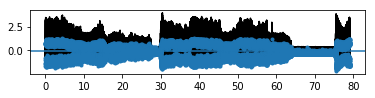

In [4]:
#flydir = '/home/alysha/media/imager/FlyDataD/lysh_ephys_ata_old/'
#flydir = '/home/alysha/media/imager/FlyDataD/brad_b2_data/'

#localfile = flydir + '2018_03_05_0024.abf'
#localfile = flydir + '2018_10_29_0009.abf'
#localfile = flydir + '2018_10_30_0033.abf'
 
r =AxonIO(localfile)
 
bl = r.read_block(lazy=False, cascade=True)
 
hutch = np.asarray(bl.segments[0].analogsignals[5])
 
fs_axon = 1.0/20000.0
 
times=np.linspace(0,len(hutch)/(1/fs_axon),len(hutch))
 
# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)
 
ax1 = plt.subplot(311)
 
ax1.plot(times,hutch_det,'k')
 
#identify all relative minima
from scipy.signal import argrelmin
inds = argrelmin(hutch_det, order = 5)
ax1.plot(times[inds], hutch_det[inds], '.')
ax1.axhline(-0.08)
inds = np.array(inds)
inds = np.transpose(inds)


In [7]:
'''
abf_sp = fly.abf_times[1] #abf spike period
ca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]
start = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)

#make a time array for the recording epoch
ep_times = np.array(fly.abf_times[start:stop])
ep_times -= ep_times[0]

#load this into memory since I will use it quite a bit
spike_sig = np.array(fly.abf_electrode[start:stop])
##make sure to sore this spike signal again -- messy input from B1, B2 and iii3
####i1_ca = fly.ca_camera_left_model_fits['i1']
## another way of extracting b1 activity
#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))
#F = np.percentile(F_,0.01)
#DF_F = (F_-F)/F
#b1_ca = DF_F
'''

"\nabf_sp = fly.abf_times[1] #abf spike period\nca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs\n\n#get the idx's where the ca data is aquired\nep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]\nstart = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period \nstop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)\n\n#make a time array for the recording epoch\nep_times = np.array(fly.abf_times[start:stop])\nep_times -= ep_times[0]\n\n#load this into memory since I will use it quite a bit\nspike_sig = np.array(fly.abf_electrode[start:stop])\n##make sure to sore this spike signal again -- messy input from B1, B2 and iii3\n####i1_ca = fly.ca_camera_left_model_fits['i1']\n## another way of extracting b1 activity\n#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))\n#F = np.percentile(F_,0.01)\n#DF_F = (F_-F)/F\n#b1_ca = DF_F\n"

/home/alysha/.local/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


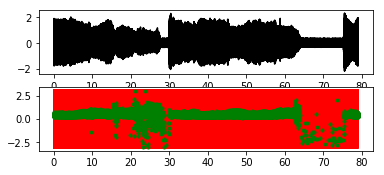

In [5]:
 
## identify the ventral flip of each wingbeat by applying a threshold
thresh = -.01 #adjust as needed
flipInds = []
flipInds = np.argwhere(hutch_det[inds]>thresh)
flipInds = inds[flipInds]
flipInds = flipInds[:,0]
 
#% now find the phase of the ventral flip 
 
#filter hütchen signal to make it more sinusoidal
 
from scipy import signal
from scipy.signal import butter, lfilter, freqz
 
def butter_lowpass(highcut, fs, order=4):
    nyq = 0.5 * fs
    #low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [high], btype='low', analog=False)
    return b, a
 
 
# Filter requirements.
order = 4
fs = 20000.0       # sample rate, Hz
lowcut = 100
highcut = 300.0  # desired cutoff frequency of the filter, Hz
 
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(highcut, fs, order)
 
 
hutch_filt = signal.filtfilt(b, a, hutch_det)
 
ax2 = plt.subplot(312, sharex=ax1)
 
ax2.plot(times,hutch_filt,'k')
 
# perform a Hilbert transformation on the filtered signal to calculate instantaneous phase, amplitude, etc.
from scipy.signal import hilbert
 
hutch_analytic = hilbert(hutch_filt)
inst_phase = np.angle(hutch_analytic)
 
 
ax3 = plt.subplot(313, sharex=ax1)
 
# plot the identified ventral flip on the phase data
ax3.plot(times,hutch_analytic,'k')
ax3.plot(times,inst_phase,'r')
ax3.plot(times[flipInds],inst_phase[flipInds],'g.')

#%matplotlib inline 
#%pylab inline
#%matplotlib inline


import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
#from constrained_foopsi import *
#%matplotlib inline

In [6]:
import sys


In [7]:
!pwd
#%matplotlib inline  

/home/alysha/analysis_files/S104


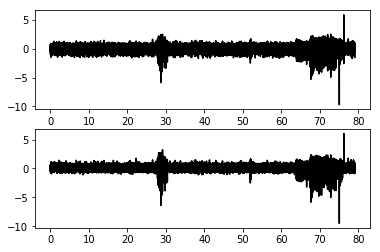

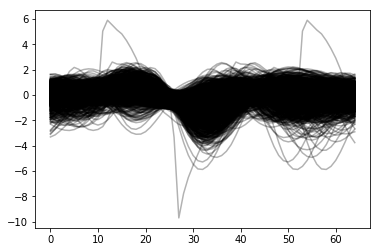

In [8]:
#%% detect muscle spikes and sort them
 
musc = np.asarray(bl.segments[0].analogsignals[0])
 
plt.figure(2)
ax1 = plt.subplot(211)
ax1.plot(times,musc,'k')
 
#apply median filter and detrend muscle signal
 
musc_det = musc-signal.medfilt(musc,35)
 
ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(times,musc_det,'k')
 
# threshold the detrended signal (convert the spikes into binary)
# calculate the change in, identify the spike starts/stops 
#thresh = 4
thresh = 0.25 #0.6
deltas = np.diff(np.array(-1*musc_det>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
intervals = np.hstack((starts,stops))
spiketimes = [np.argmax(musc[sta:stp])+sta for sta,stp in intervals][2:-2]
waveforms = [musc[pk-25:pk+40] for pk in spiketimes]
 
#plot the collected waveforms
plt.figure(3)
for i in range(len(waveforms)):
    plt.plot(waveforms[i], 'k', alpha = 0.3)
 
wv_mtrx = np.vstack([np.array(wv) for wv in waveforms])



In [ ]:
#%matplotlib inline


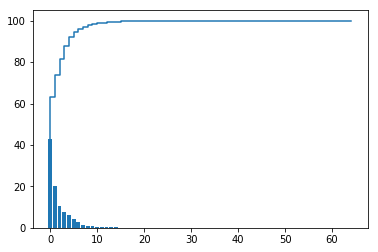

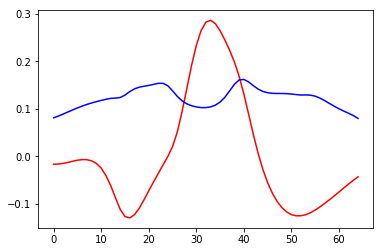

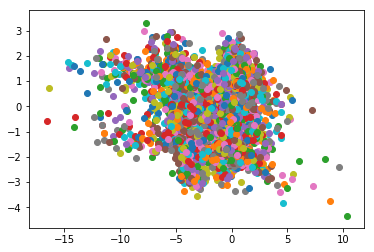

In [9]:
#%% extract the features of the waveforms to cluster the data
 
cov_wav = np.cov(wv_mtrx.T)
eig_vals, eig_vecs = np.linalg.eig(cov_wav)
#for ev in eig_vecs:
    #np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
 
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
 
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
 
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
 
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
 
plt.figure(4)
plt.bar(range(65), var_exp)
plt.step(range(65), cum_var_exp)
 
#contruct the projection matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(65,1),
                      eig_pairs[1][1].reshape(65,1)))
 
plt.figure(5)
plt.plot(matrix_w[:,0],'r')
plt.plot(matrix_w[:,1],'b')
 
plt.figure(6)
proj = []
proj1 = []
proj2 =[]
for i in range(len(wv_mtrx)):
    musc_proj = np.dot(wv_mtrx[i], matrix_w)
    proj.append(musc_proj[0])
    proj1.append(musc_proj[1])
    proj2.append(musc_proj)
    plt.scatter(musc_proj[0], musc_proj[1])
 
     
X = np.array(list(zip(proj, proj1)))
 
    

[[1.51223953 0.29030374]
 [0.0052734  0.32823457]]


' \ntest3 = np.argwhere(labels=0)\n \nfor i in range(len(test3)):\n    plt.plot(wv_mtrx[test3[i]])\n'

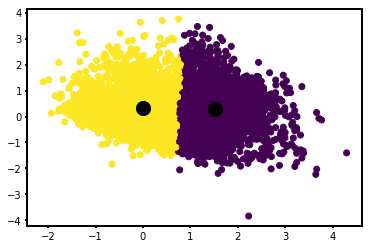

In [344]:
#%%
from sklearn.cluster import KMeans
 
# Number of clusters
#kmeans = KMeans(n_clusters=2)
#n_clusters=1
n_clusters=2
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
 
#print(C) 
print(centroids)
 
plt.figure(7)
plt.scatter(X[:, 0], X[:, 1], c=labels)
 
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200);
 
""" 
test3 = np.argwhere(labels=0)
 
for i in range(len(test3)):
    plt.plot(wv_mtrx[test3[i]])
"""
    

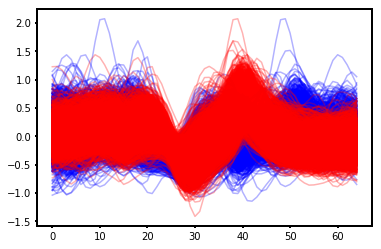

In [345]:
#%%


###### categorize and plot the labels 

labeled_spikes= zip(spiketimes,labels)


def cutoff(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

Type_a_spikes = cutoff(0.5, labeled_spikes)

def cutoff_2(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

Type_b_spikes = cutoff_2(0.5, labeled_spikes)



#print(zip_hutch)
#
x_val = [x[0] for x in Type_a_spikes]
y_val = [x[1] for x in Type_a_spikes]

x_val_b = [x[0] for x in Type_b_spikes]
y_val_b = [x[1] for x in Type_b_spikes]



labeled_waveforms_type_a = [musc[pk-25:pk+40] for pk in x_val]

labeled_waveforms_type_b = [musc[pk-25:pk+40] for pk in x_val_b]
 
#plot the collected waveforms
plt.figure(3)
for i in range(len(labeled_waveforms_type_a)):
    plt.plot(labeled_waveforms_type_a[i], 'b', alpha = 0.3)

plt.figure(3)
for i in range(len(labeled_waveforms_type_b)):
    plt.plot(labeled_waveforms_type_b[i], 'r', alpha = 0.3)
    
#go back and plot the labeled peaks
#find old code on old computer for this
#improve documentation for this



In [346]:
crimson = np.asarray(bl.segments[0].analogsignals[12])  #7

(7.1, 7.2)

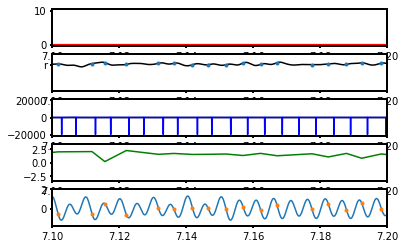

In [353]:
#%%

###Use Hilbert function againt o calculate the instantaneous freq. of B2

plt.figure(12)

# Filter requirements.
order = 4 #10  #4
fs = 20000.0       # sample rate, Hz
lowcut = 100
highcut = 200.0  # desired cutoff frequency of the filter, Hz



def butter_lowpass_1(highcut, fs, order=10):
    nyq = 0.5 * fs
    #low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [high], btype='low', analog=False)
    return b, a
 
times=np.linspace(0,len(hutch)/(1/fs_axon),len(hutch))

 
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass_1(highcut, fs, order)
 
 
muscb2_filt = signal.filtfilt(b, a, musc_det)

ax1 = plt.subplot(511)
ax1.plot(times, crimson, 'r')
 
ax2 = plt.subplot(512, sharex=ax1)
 
ax2.plot(times,muscb2_filt,'k')
ax2.plot(times[x_val_b], muscb2_filt[x_val_b], '.', 'r')
 
# perform a Hilbert transformation on the filtered signal to calculate instantaneous phase, amplitude, etc.
from scipy.signal import hilbert

hutch_det_filt = signal.filtfilt(b, a, hutch_det)
    
musc_analytic = hilbert(muscb2_filt)
filt_hutch= hilbert(hutch_det_filt)
#inst_phase = np.angle(musc_analytic)
inst_phase = np.angle(filt_hutch)

#instantaneous_phase = np.unwrap(np.angle(musc_analytic))
instantaneous_frequency = (np.diff(inst_phase) /(2.0*np.pi) * fs)
 
ax3 = plt.subplot(513, sharex=ax1)
 
# plot the identified ventral flip on the phase data
ax3.plot(times,musc_analytic,'k')
#ax3.plot(times,inst_phase,'r')

times_freq = np.delete(times, 1438719)

ax3.plot(times_freq, instantaneous_frequency, 'b')
#ax3.plot(times[flipInds],inst_phase[flipInds],'g.')

ax4 = plt.subplot(514, sharex=ax1)
ax4.plot(times[x_val_b], inst_phase[x_val_b], 'g')


ax5 = plt.subplot(515, sharex=ax1)
ax5.plot(times, hutch_det_filt)
ax5.plot(times[x_val_b], hutch_det_filt[x_val_b], '.')

ax5.set_xlim(7.1, 7.2)

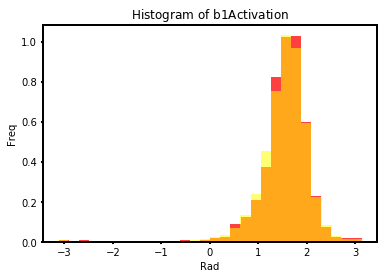

In [354]:
#With crimson light!

crimson = np.asarray(bl.segments[0].analogsignals[12])  #7


plt.figure(13)
ax1 = plt.subplot(111)

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#split via crimson

#ax1.plot(times,crimson,'r')
#plt.fill_between(times[inds],crimson[inds])

#crimson_labeled_spikes_0= zip(inst_phase[x_val], crimson[x_val], musc[x_val])
crimson_labeled_spikes_2= zip(inst_phase[x_val_b], crimson[x_val_b], musc[x_val_b])


def cutoff_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] > threshold, sortedData)
    finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

#Spikes_1_crimson = cutoff_crimson(0.2, crimson_labeled_spikes_0)
Spikes_2_crimson = cutoff_crimson(.2, crimson_labeled_spikes_2)

def cutoff_no_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] < threshold, sortedData)
    finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

#Spikes_1_no_crimson = cutoff_no_crimson(0.2, crimson_labeled_spikes_0)
Spikes_2_no_crimson = cutoff_no_crimson(0.2, crimson_labeled_spikes_2)



#print(zip_hutch)


#x_val_crimson_1 = [x[0] for x in Spikes_1_crimson]
x_val_crimson_2 = [x[0] for x in Spikes_2_crimson] #COMPARING PHASE


#x_val_no_crim_1 = [x[0] for x in Spikes_1_no_crimson]

x_val_no_crim_2 = [x[0] for x in Spikes_2_no_crimson]



#labeled_waveforms_type_a = [musc[pk-25:pk+40] for pk in x_val]

#labeled_waveforms_type_b = [musc[pk-25:pk+40] for pk in x_val_b]


#hist_crimson_spikes = x_val_crimson_1 
#hist_no_crimson_spikes = x_val_no_crim_1 

hist_crimson_spikes = x_val_crimson_2
hist_no_crimson_spikes = x_val_no_crim_2

matplotlib.pyplot.hist(hist_crimson_spikes, bins=30, normed=1, facecolor='red', alpha=0.75)
matplotlib.pyplot.hist(hist_no_crimson_spikes, bins=30, normed=1, facecolor='yellow', alpha=0.55)

####for B2
#matplotlib.pyplot.hist(hist_crimson_spikes, bins=60, normed=1, facecolor='red', alpha=0.75)
#matplotlib.pyplot.hist(hist_no_crimson_spikes, bins=60, normed=1, facecolor='yellow', alpha=0.55)



#mu, sigma = 100, 15
bins = 100
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
#n, bins, patches = plt.hist(musc_det[x_val_0], 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Rad')
plt.ylabel('Freq')
plt.title(r'$\mathrm{Histogram\ of\ b1  Activation}$')
#plt.title(r'$\mathrm{Histogram\ of\ b2  Activation}$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(False)

plt.show()

# sanity check: just plot instantaneous phase over the whole experiment
#plt.figure(14)
#plt.plot(inst_phase[x_val_b], 'k')


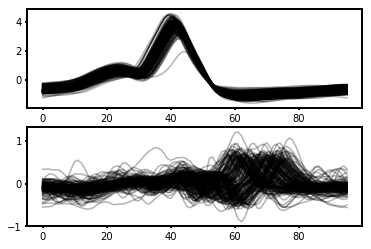

In [355]:
#%% gather a subset of the hütchens before and during a stimulus period to display them overlaid

hutch_seg = hutch[928548:948438]
musc_seg = musc[928548:948438]

deltas = np.diff(np.array(-1*hutch_det[928548:948438]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]

plt.figure(2)
plt.subplot(211)
for i in range(len(hut_waveforms)):
    plt.plot(hut_waveforms[i], 'k', alpha = 0.3)
    
plt.subplot(212)
for i in range(len(musc_wave)):
    plt.plot(musc_wave[i], 'k', alpha = 0.3)


In [362]:
import pandas as pd

#flydir = '/Volumes/NO\ NAME/Data_analysis/12_15_0006/'
#flydir = '~/csv_files/2018_03_26_0008/'

flydir_save = '/home/alysha/analysis_files/S104/csv/'

hist_crimson_spikes = pd.DataFrame((hist_crimson_spikes))
#hist_crimson_spikes.to_csv(flydir + 't4/hist_crimson_spikes.csv', index=False)
hist_crimson_spikes.to_csv(flydir_save + 'hist_crimson_spikes_s104_b1_01.csv', index=False)

hist_no_crimson_spikes = pd.DataFrame((hist_no_crimson_spikes))
#hist_no_crimson_spikes.to_csv(flydir + 't4/hist_no_crimson_spikes.csv', index=False)
hist_no_crimson_spikes.to_csv(flydir_save + 'hist_no_crimson_spikes_s104_b1_01.csv', index=False)


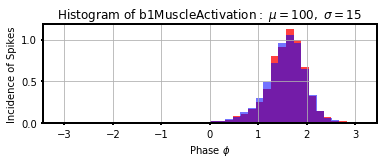

In [357]:
### Cumulative historgram or regular historgram

### for phase of B1 with and without crimson
###  degree of power muscle activation with and without crimson

#!/usr/bin/env python

plt.figure(13)
ax1 = plt.subplot(211)

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn

#split via crimson

#ax1.plot(times,crimson,'r')
#plt.fill_between(times[inds],crimson[inds])

crimson_labeled_spikes= zip(inst_phase[x_val_b], crimson[x_val_b], musc[x_val_b])


#plto inst phase'

def cutoff_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] > threshold, sortedData)
    finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

#Spikes_1_crimson = cutoff_crimson(0.2, crimson_labeled_spikes_0)
Spikes_2_crimson = cutoff_crimson(.2, crimson_labeled_spikes_2)

def cutoff_no_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] < threshold, sortedData)
    finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

Spikes_2_no_crimson = cutoff_no_crimson(0.2, crimson_labeled_spikes_2)

'''


def cutoff_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] > threshold, sortedData)
    finalList3 =filter(lambda x: x[1] < threshold+0.5, finalList2)
    finalList =filter(lambda x: x[1] < 45, finalList3)
    return finalList if len(finalList) > 2 else 'No values found'

Spikes_1_crimson = cutoff_crimson(2.2, crimson_labeled_spikes)
#Spikes_2_crimson = cutoff_crimson(0.2, crimson_labeled_spikes_2)

def cutoff_no_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] < threshold, sortedData)
    finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

Spikes_1_no_crimson = cutoff_no_crimson(0.20, crimson_labeled_spikes)
#Spikes_2_no_crimson = cutoff_no_crimson(0.2, crimson_labeled_spikes_2)

'''

#print(zip_hutch)


x_val_crimson_1 = [x[0] for x in Spikes_2_crimson]
###x_val_crimson_2 = [x[2] for x in Spikes_2_crimson]
#x_val_crimson_1 = []

x_val_no_crim_1 = [x[0] for x in Spikes_2_no_crimson]
#x_val_no_crim_1 = []
###x_val_no_crim_2 = [x[2] for x in Spikes_2_no_crimson]
#x_val_no_crim_2 = []

#labeled_waveforms_type_a = [musc[pk-25:pk+40] for pk in x_val]

#labeled_waveforms_type_b = [musc[pk-25:pk+40] for pk in x_val_b]


hist_crimson_spikes = x_val_crimson_2 #+ x_val_crimson_2
hist_no_crimson_spikes = x_val_no_crim_2 #+ x_val_no_crim_2

matplotlib.pyplot.hist(hist_crimson_spikes, bins=40, normed=1, facecolor='red', alpha=0.75)
matplotlib.pyplot.hist(hist_no_crimson_spikes, bins=40, normed=1, facecolor='blue', alpha=0.55)


#mu, sigma = 100, 15
bins = 40
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
#n, bins, patches = plt.hist(musc_det[x_val_0], 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Phase $\phi$')
plt.ylabel('Incidence of Spikes')
plt.title(r'$\mathrm{Histogram\ of\ b1 Muscle Activation:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()


(644315, 9.33197)


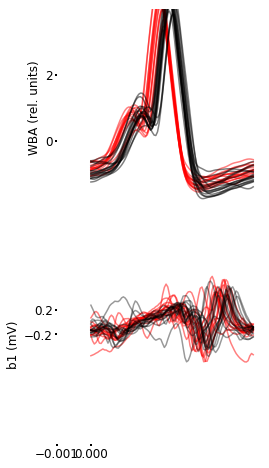

In [358]:
#### Maybe delete this


crimson = np.asarray(bl.segments[0].analogsignals[12])

indices = np.arange(len(crimson))

crimson_time= zip(indices, times, crimson)

def crimson_selection(threshold, data):
    sortedData = sorted(data, key=lambda x: x[2])
    finalList = filter(lambda x: x[2] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high = crimson_selection(8.0, crimson_time)



crimson_inds_1= zip(indices, crimson)

def crimson_selection_1(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high_1 = crimson_selection_1(5.0, crimson_inds_1)

####a
###Just take wave finder at those times!


def crimson_selection_none(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_zero_stim = crimson_selection_none(0.1, crimson_inds_1)

print(crimson_selection_high_1[0])

# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)

#hutch_seg = hutch[1260000:1263000]
#musc_seg = musc[1260000:1263000]

hutch_seg = hutch[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]
musc_seg = musc[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]

deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]

plt.figure(2)
plt.rc('font', size=12)
plt.rc('axes',linewidth=.5)
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['axes.linewidth'] = 2

fs_axon = 1.0/20000.0
t= np.linspace(0,len(hut_waveforms[0])/(1/fs_axon),len(hut_waveforms[0]))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('w')

ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'r', alpha = 0.5)


ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'r', alpha = 0.5)


ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([])
ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


#hutch_seg = hutch[1010000:1013000]
#musc_seg = musc[1010000:1013000]

hutch_seg = hutch[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]
musc_seg = musc[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]



deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]



ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'k', alpha = 0.5)

ax.set_ylabel('WBA (rel. units)')
ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([0, 2])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'k', alpha = 0.4) #0.5

ax2.set_ylabel('b1 (mV)')
ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([-.2, .2])
ax2.spines['bottom'].set_bounds(-0.001, 0)
ax2.set_xticks([-0.001, 0])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


plt.savefig('hutch_n_spike.pdf')
#gcf().savefig


In [359]:
#hutch_seg = hutch[1010000:1013000]
#musc_seg = musc[1010000:1013000]

hutch_seg = hutch[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]
musc_seg = musc[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]



deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]



ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'k', alpha = 0.5)

ax.set_ylabel('WBA (rel. units)')
ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([0, 2])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'k', alpha = 0.4) #0.5

ax2.set_ylabel('b1 (mV)')
ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([-.2, .2])
ax2.spines['bottom'].set_bounds(-0.001, 0)
ax2.set_xticks([-0.001, 0])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')




In [360]:
###Find crimson onset times ###

idxs= list(range(len(times)))
idxs=np.asarray(idxs)

#crimson_times = zip(times, crimson)
crimson_idxs = zip(idxs, crimson)

stimulus_diff = np.diff(crimson)
crimson_diff_times = zip (idxs, stimulus_diff)

def det_crim_onset(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    #finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

#Spikes_1_crimson = cutoff_crimson(0.2, crimson_labeled_spikes_0)
crimson_onset_points = det_crim_onset(.5, crimson_diff_times)

#crimson_onset_times = [x[0] for x in crimson_onset_points]
crimson_onset_indx= [x[0] for x in crimson_onset_points]

In [361]:
freq = np.asarray(bl.segments[0].analogsignals[4])



In [ ]:
CHANGE VALUES BELOW

In [363]:
####WSA (L-R)

L = np.asarray(bl.segments[0].analogsignals[1])
R = np.asarray(bl.segments[0].analogsignals[2])
WSA = L - R

L_times = zip(times, L)
R_times = zip(times, R)
WSA_times = zip(times, WSA)

flydir_save + 'hist_crimson_spikes_s104_b1_01.csv'

for i in range(len(crimson_onset_indx)):
    k= str(i)
    L_clip= pd.DataFrame(L[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    L_clip.to_csv(flydir_save + '01' + k + 'L_analysis.csv', index=False)
    
for i in range(len(crimson_onset_indx)):
    k= str(i)
    R_clip= pd.DataFrame(R[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    R_clip.to_csv(flydir_save + '01' + k + 'R_analysis.csv', index=False)

for i in range(len(crimson_onset_indx)):
    k= str(i)
    WSA_clip= pd.DataFrame(WSA[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    WSA_clip.to_csv(flydir_save + '01' + k + 'WSA_analysis.csv', index=False)

In [364]:
####WBF

freq = np.asarray(bl.segments[0].analogsignals[4])

freq_times = zip(times, freq)

for i in range(len(crimson_onset_indx)):
    k= str(i)
    freq_clip= pd.DataFrame(freq[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    freq_clip.to_csv(flydir_save + '03' + k + 'freq_analysis.csv', index=False)


In [365]:
####Instantaneous frequency

freq = np.asarray(bl.segments[0].analogsignals[4])

inst_phase_times = zip(times[x_val_b], inst_phase[x_val_b])

for i in range(len(crimson_onset_indx)):
    k= str(i)
    phase_clip= pd.DataFrame(inst_phase_times[crimson_onset_indx[i]-200:crimson_onset_indx[i]+800])
    phase_clip.to_csv(flydir_save + '03' + k + 'phase_analysis.csv', index=False)


In [366]:
f3 = crimson

IndexError: list index out of range

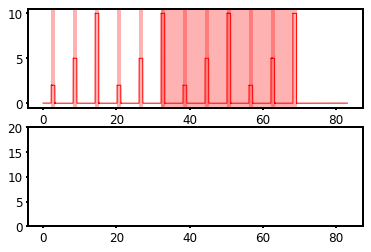

In [367]:
crimson_on = []
crimson_off = []

for f in range(len(f3)):
    if crimson[f]-crimson[f-1]>= 0.5:
        crimson_on.append(f)
    if crimson[f]-crimson[f-1]<= -0.5:
        crimson_off.append(f)


fig =plt.figure(14)

ax1 = plt.subplot(211)
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
for i in range(len(crimson_on)):
    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)

In [368]:
inds = np.asarray(range(1, len(times)))

In [369]:
inst_phase_zip = zip(times[x_val_b], inst_phase[x_val_b], crimson[x_val_b])

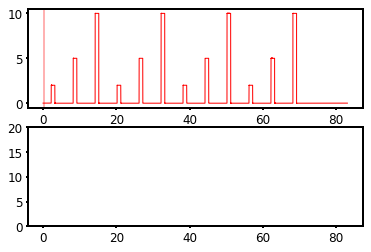

In [370]:

crimson_on = []
crimson_off = []

crimson_spikes_inds = crimson[x_val_b]

for f in range(len(crimson_spikes_inds)):
    if crimson_spikes_inds[f]-crimson_spikes_inds[f-1]>= 0.5:
        crimson_on.append(f)
    if crimson_spikes_inds[f]-crimson_spikes_inds[f-1]<= -0.5:
        crimson_off.append(f)


fig =plt.figure(14)

ax1 = plt.subplot(211)
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
for i in range(len(crimson_on)):
    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)

In [371]:
spike_inst_phase = inst_phase[x_val_b]

In [372]:
df_inst_phase_upon_signal = []

In [373]:
crimson_on[0]-50
print(crimson_off[0]+50)
spike_inst_phase[560:889]

525


array([ 1.35797793,  1.58060391,  1.50451785,  1.39035351,  1.51427827,
        1.47008632,  1.6103978 ,  1.41025212,  1.75563854,  1.11488012,
        1.6581801 ,  1.48111947,  1.4088541 ,  1.8804604 ,  1.24959745,
        1.82990001,  1.56674467,  1.81781817,  1.73381706,  1.65321988,
        1.98140472,  1.21268474,  1.67392528,  1.56150601,  1.50858831,
        1.5241964 ,  0.04265743,  1.5419424 ,  1.35544053,  1.80637209,
        1.57834458,  1.39280047,  2.11126337,  1.32361231,  1.88506835,
        1.56256385,  1.97278459,  1.48219843,  1.77147496,  1.45414201,
        1.57159681,  1.35296563,  1.66643052,  1.67371076,  1.8294265 ,
        1.67029106,  1.47105288,  1.38752988,  1.8563559 ,  1.41989849,
        1.81839841,  1.56994771,  1.47742774,  1.45692007,  1.73436648,
        1.00788195,  1.29962907,  1.50137188,  1.57346335,  1.36934091,
        1.11496933,  1.44399367, -0.44546856,  1.81383766,  2.07925385,
        1.92417372,  1.28532012,  1.81269477,  1.28337784,  1.90

In [374]:
df_inst_phase_upon_signal_2 = pd.DataFrame()

for i in range(len(crimson_on)):
    print i
    on_signal = crimson_on[i]
    print on_signal
    off_signal = crimson_off[i]
    print off_signal
    f = spike_inst_phase[on_signal-50: off_signal+50]
    df1 = pd.DataFrame({i: f})
    df_inst_phase_upon_signal_2 =pd.concat([df_inst_phase_upon_signal_2,df1], ignore_index=True, axis=1)
    #print f
    #df_inst_phase_upon_signal_2[i]=f
    #print df_inst_phase_upon_signal_2

0
355
475
1
1290
1463
2
2347
2535
3
3471
3498
4
4316
4512
5
5486
5681
6
6651
6844
7
7814
8016
8
8971
9172
9
10183
10387
10
11116
11308
11
12318
12521


In [375]:
df_inst_phase_upon_signal_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.526668,1.497679,1.868534,2.011067,1.519904,1.422481,0.962627,1.722947,0.392672,0.648808,1.643561,1.356692
1,1.516633,1.186793,1.517725,0.732619,0.796758,1.557482,1.236506,1.524182,2.156647,2.097724,-0.092539,1.081614
2,1.837104,1.701073,1.564545,1.391437,1.547860,0.824076,1.490554,1.522093,1.061161,1.001465,0.954994,1.402800
3,1.809541,1.108968,2.051153,1.208248,0.827787,1.906662,1.238675,1.838592,1.541679,1.900537,1.780233,1.378032
4,1.804986,1.618146,1.050911,1.434885,1.071106,0.563416,1.327678,1.076456,1.902376,1.712337,0.543687,1.310573


'freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'

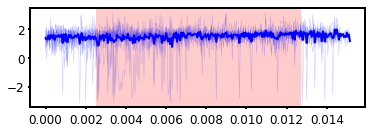

In [377]:
fig =plt.figure(15)

ax1 = plt.subplot(211)

for i in df_inst_phase_upon_signal_2:
    ax1.plot(times[0:304], df_inst_phase_upon_signal_2[i], 'b', linewidth =0.5, alpha = 0.2)
    
#ax1.set_ylim((-0.5,100))
#ax1.set_ylimit(-0.1, 100)

mean_df_inst_phase_upon_signal_2 = df_inst_phase_upon_signal_2.mean(axis=1)
ax1.plot(times[0:304], mean_df_inst_phase_upon_signal_2, 'b', linewidth =2.0)

ax1.axvspan(times[50], times[254], facecolor = 'r', edgecolor = 'none', alpha = 0.2)

'''
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
#for i in range(len(crimson_on)):
#    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
#    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)

Text(0.5,0,u'Time (s)')

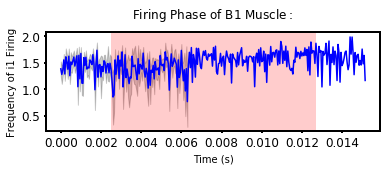

In [378]:
fig =plt.figure(16)

from scipy import stats

variance = stats.sem(df_inst_phase_upon_signal_2,axis = 1)
mean = df_inst_phase_upon_signal_2.mean(axis=1)

#wbf_means = wbf_means[0:len(wbf_means):10]
#wbf_error = stats.sem(all_wbf,axis = 0)
#wbf_error = wbf_error[0:len(wbf_error):10]

ax2 = fig.add_subplot(212)

#ax2.axvspan(0.25, .75, facecolor = 'r', edgecolor = 'none', alpha = 0.3)
ax2.axvspan(times[50], times[254], facecolor = 'r', edgecolor = 'none', alpha = 0.2)
ax2.plot(times[0:304],mean, 'b')
ax2.fill_between(times[0:304],mean-variance, mean+variance,color='k', alpha = 0.2, edgecolor = 'none')

ax2.set_title(r'$\mathrm{Firing\ Phase\ of\ B1\ Muscle:}$', size=12, horizontalalignment='center',  y=1.08)#   \ \mu=100,\ \sigma=15$', size=12, horizontalalignment='center',  y=1.08) #verticalalignment='top')
ax2.set_ylabel('Frequency of i1 Firing', size=10)
plt.xlabel('Time (s)', size=10) # $\phi$', size=10)
#ax2.title('B2 spike frequency')

In [165]:
from scipy.signal import argrelmin
inds = argrelmin(hutch_det, order = 5)
ax1.plot(times[inds], hutch[inds], '.')
 
 
#plt.show()
# Make it interactive with Bokeh
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 

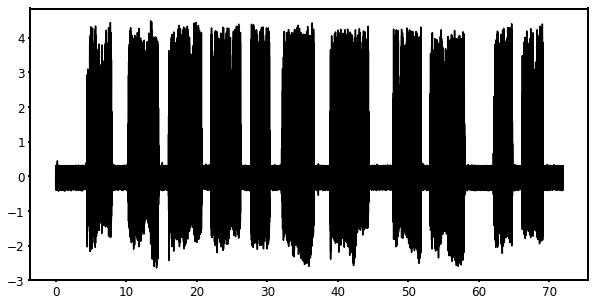

In [166]:
#from detect_peaks import detect_peaks
#ind = detect_peaks(hutch, show=True)
 
 
# In[6]:
 
#now threshold for the real spikes ~0.5 mV
import bisect
#from bisect import bisect
 
fig = plt.figure(figsize=(10,5))
#ax = plt.figure(figsize=(5,5))
fig.set_facecolor('w')
ax1 = plt.subplot(111)
 
ax1.plot(times,hutch_det,'k')
#ax1.axvline(58.8983)
 
 

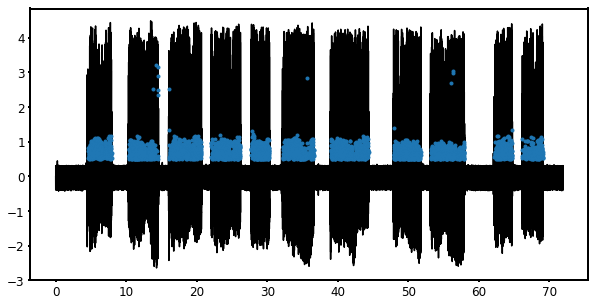

In [167]:
from scipy.signal import argrelmin
inds = argrelmin(hutch_det, order = 5)
 
 
 
zip_hutch = zip(times[inds], hutch[inds])
#print thresh_hutch
 
threshold = 0.5
 
zipped = sorted(zip_hutch, key=lambda x: (x[1]))
#print zipped
 
keys = [x[1] for x in zipped] 
 
#index = bisect.bisect(zip_hutch, (None, lower_thresh))
#index = bisect.bisect_right(zip_hutch, (zip_hutch[0][0], lower_thresh))
index =  bisect.bisect(zipped, (None,0.5))
#index = bisec.bisect_right(zipped())
del(zipped[:index])
#print zipped[:index]
#print (index)
 
#print (bisect.bisect(zipped,(-.01, lower_thresh)))
 
 
def cutoff(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'
 
filtered_points = cutoff(0.5, zipped)
 
#print(zip_hutch)
 
x_val = [x[0] for x in filtered_points]
y_val = [x[1] for x in filtered_points]
 
 
#print y_val
#print zipped
 
fig = plt.figure(figsize=(10,5))
#ax = plt.figure(figsize=(5,5))
fig.set_facecolor('w')
ax1 = plt.subplot(111)
 
ax1.plot(times,hutch_det,'k')
#ax1.axvline(58.8983)
 
 
from scipy.signal import argrelmin
inds = argrelmin(hutch_det, order = 5)
ax1.plot(x_val, y_val, '.')
 
 
#plt.show()
# Make it interactive with Bokeh
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 

In [168]:
#from detect_peaks import detect_peaks
#ind = detect_peaks(hutch, show=True)
 
 
# In[7]:
 
### Establish period
 
sortedData = sorted(filtered_points, key=lambda x: x[0])
 
x_val = [x[0] for x in sortedData]
y_val = [x[1] for x in sortedData]
 
#print(sortedData)
 
a=x_val[5]-x_val[4]
print a
b=x_val[6]-x_val[5]
print b
c=x_val[7]-x_val[6]
print c
d=x_val[8]-x_val[7]
print d
 
###  period ~0.005   range 0.0047-0.0053
 
 

0.004600003197289482
0.004450003093029231
0.0046000031972885935
0.004550003162535177


In [169]:
# In[8]:
 
#ls /Users/rohitdesouza/anaconda/envs/python2/bin
 
###  Establish wingstrokes 
 
import numpy
 
sortedData = sorted(filtered_points, key=lambda x: x[0])
 
x_val = [x[0] for x in sortedData]
y_val = [x[1] for x in sortedData]
 
x_val_shift = x_val[1:]
 
wingstroke_windows = zip(x_val[:len(x_val)-1], x_val_shift)
start_wingstroke = [x[0] for x in wingstroke_windows]
end_wingstroke = [x[1] for x in wingstroke_windows]
 
from operator import sub
 
periods = map(sub, end_wingstroke, start_wingstroke)
 
"""
v = numpy.diff(t)
wingstroke=[]
 
[j-i for i, j in zip(t[:-1], t[1:])]
"""
 
#print (periods)
 
 

'\nv = numpy.diff(t)\nwingstroke=[]\n \n[j-i for i, j in zip(t[:-1], t[1:])]\n'

Text(0,0.5,u'Voltage (mV)')

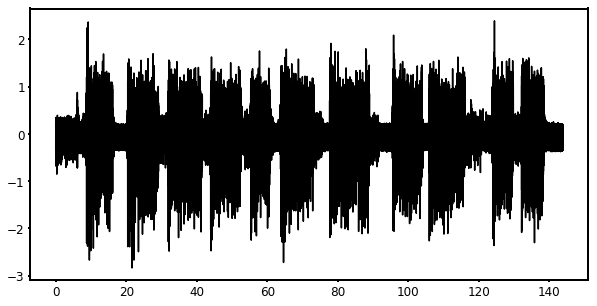

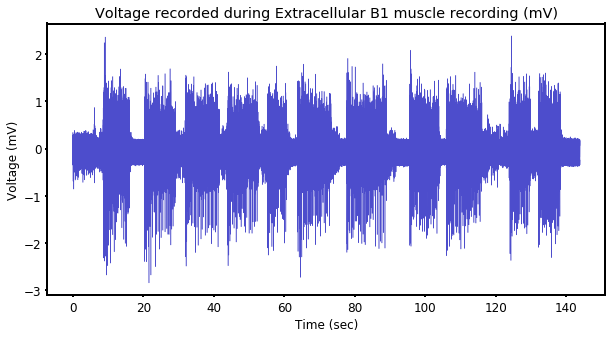

In [170]:
# In[9]:
 
##### Import electrophysiological data
 
 
#localfile = '2017_11_03_0028.abf'
 
r = AxonIO(localfile)
 
bl = r.read_block(lazy=False, cascade=True)
 
#hutch = np.asarray(bl.segments[0].analogsignals[5])
ephys = np.asarray(bl.segments[0].analogsignals[0])
 
#fs_axon = 1.0/20000.0
 
fs_axon = 1.0/10000.0
 
times=np.linspace(0,len(ephys)/(1/fs_axon),len(ephys))
 
 
ephys_det = ephys - np.mean(ephys)
 
fig = plt.figure(figsize=(10,5))
#ax = plt.figure(figsize=(5,5))
fig.set_facecolor('w')
ax1 = plt.subplot(111)
 
ax1.plot(times,ephys_det,'k')
#ax1.axvline(58.8983)
 
"""
from scipy.signal import argrelmin
inds = argrelmin(hutch_det, order = 5)
ax1.plot(times[inds], hutch[inds], '.')
 
 
#plt.show()
# Make it interactive with Bokeh
"""
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
#ax.plot(xToPlot, yToPlot, color=[.3, .3, .8], zorder=5)
ax.plot(times, ephys, color=[.3, .3, .8], linewidth=0.5) #zorder=0.1, alpha =1)
######ax.plot(time, Current, color=[.3, .8, .3], zorder=0.1, alpha = 0.5)
#ax.scatter(time, pattern_assignments, color='b', zorder=2)
ax.set_title('Voltage recorded during Extracellular B1 muscle recording (mV)')
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')
 
 

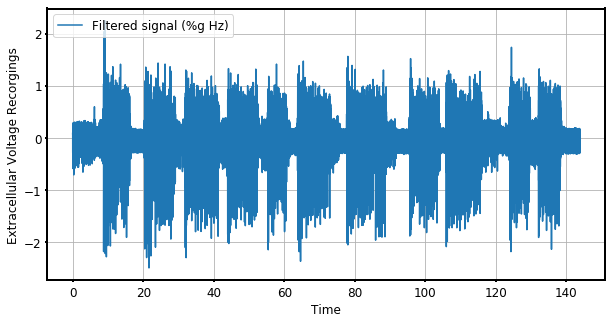

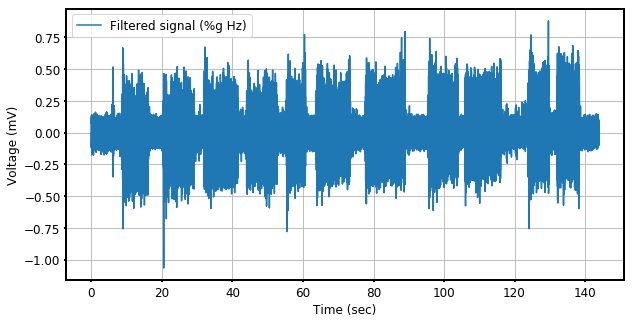

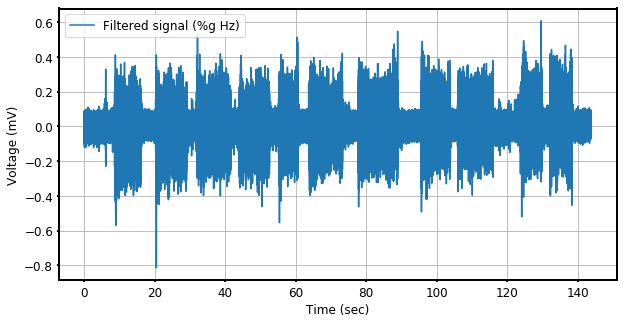

In [174]:
# In[10]:
 
#### Spike Detector ####  Part I
 
#### Perform Median filter on the raw data 
 
import numpy as np
import scipy as sp
import scipy
from scipy import *
from scipy import signal
 
y=scipy.signal.medfilt(ephys,11)
 
fig = plt.figure(figsize=(10,5))
#ax.set_ylim((-40, 8.))
plt.xlabel('Time')
plt.ylabel('Extracellular Voltage Recorgings')
plt.plot(times, y , label='Filtered signal (%g Hz)') #% f0)
#plt.xlabel('time (seconds)')
#plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
#plt.axis('tight')
plt.legend(loc='upper left')
 
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 
# In[11]:
 
#### Spike Detector ####  Part II
 
#### Subtract Median filtered data 
 
import numpy as np
import scipy as sp
import scipy
from scipy import *
from scipy import signal
 
y2=(ephys-y)
 
fig = plt.figure(figsize=(10,5))
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')
plt.plot(times, y2 , label='Filtered signal (%g Hz)') #% f0)
#plt.xlabel('time (seconds)')
#plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
#plt.axis('tight')
plt.legend(loc='upper left')
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 
# In[12]:
 
#### Spike Detector ####  Part III
 
#### Lowpass after median
 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as plt
 
 
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
 
 
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
 
 
# Filter requirements.
order = 19
#fs = 30.0       # sample rate, Hz
fs=10000
#cutoff = 3.667  # desired cutoff frequency of the filter, Hz
cutoff = 500  # desired cutoff frequency of the filter, Hz
 
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)
 
y3 = butter_lowpass_filter(y2, 1000, 10000)
 
fig = plt.figure(figsize=(10,5))
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')
plt.plot(times, y3 , label='Filtered signal (%g Hz)') #% f0)
#plt.xlabel('time (seconds)')
#plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
#plt.axis('tight')
plt.legend(loc='upper left')
 
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
###work on this

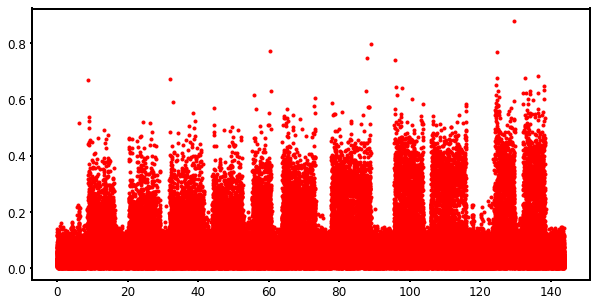

In [175]:
 
 
# In[13]:
 
#### Spike Detector ####  Part III
 
#### Aplitude thresholding for peak detection
 
fig = plt.figure(figsize=(10,5))
#ax = plt.figure(figsize=(5,5))
fig.set_facecolor('w')
ax1 = plt.subplot(111)
 
from scipy.signal import argrelmin
from scipy.signal import argrelmax
inds = argrelmax(y2, order = 5)
ax1.plot(times[inds], y2[inds], '.', color='r')
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 

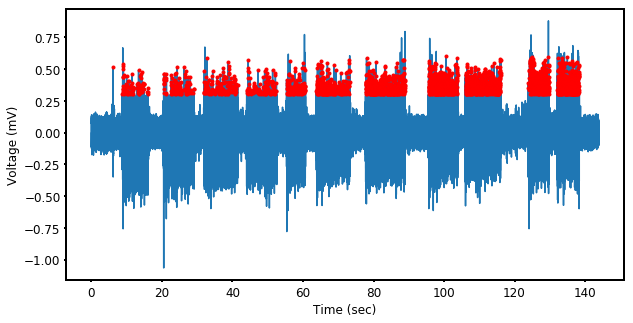

In [183]:
# In[14]:
 
#### Spike Detector ####  Part IV
 
#### Aplitude thresholding for peak detection
 
from scipy.signal import argrelmax
 
inds = argrelmax(y2, order = 5)
 
index_no =np.arange(len(y2))
 
zip_peak = zip(index_no[inds], times[inds], y2[inds])
#print thresh_hutch
 
 
threshold_peak = 0.39
 
sorted_peaks = sorted(zip_peak, key=lambda x: (x[2]))
 
 
 
keys = [x[2] for x in sorted_peaks] 
index =  bisect.bisect(sorted_peaks, (None, None, threshold_peak))
del(sorted_peaks[:index])
 
 
 
def min_cutoff(threshold, data):
    sortedData = sorted(data, key=lambda x: x[2])
    finalList = filter(lambda x: x[2] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'
 
def max_cutoff(threshold, data):
    sortedData = sorted(data, key=lambda x: x[2])
    finalList = filter(lambda x: x[2] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'
 
filtered_peaks1 = min_cutoff(0.3, sorted_peaks)
filtered_peaks = max_cutoff(0.6, filtered_peaks1)
 
#print(zip_hutch)
 
index_of_peaks = [x[0] for x in filtered_peaks]
x_val_peaks = [x[1] for x in filtered_peaks]
y_val_peaks = [x[2] for x in filtered_peaks]
 
 
 
fig = plt.figure(figsize=(10,5))
#ax = plt.figure(figsize=(5,5))
fig.set_facecolor('w')
ax1 = plt.subplot(111)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')
plt.plot(times, y2 , label='Filtered signal (%g Hz)') #% f0)
 
ax1.plot(x_val_peaks, y_val_peaks, '.', color='r')
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 

In [185]:
# In[15]:
 
### Determine the phase and plot on Hütchens
 
#ls /Users/rohitdesouza/anaconda/envs/python2/bin
 
###  Establish wingstrokes 
 
wingstroke_windows #zip(x_val[:len(x_val)-1], x_val_shift)
start_wingstroke #[x[0] for x in wingstroke_windows]
end_wingstroke #[x[1] for x in wingstroke_windows]
periods # map(sub, end_wingstroke, start_wingstroke)
peak_timing= [x[0] for x in filtered_peaks]
 
peak_phase_info = map(sub, end_wingstroke, peak_timing)
 
 
 
# In[16]:
 
#### Plot peaks on Hütchens 
 
#print (index_of_peaks)
 
 
fig = plt.figure(figsize=(10,5))
#ax = plt.figure(figsize=(5,5))
fig.set_facecolor('w')
ax1 = plt.subplot(111)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')
plt.plot(times, hutch_det , label='Filtered signal (%g Hz)') #% f0)
 
 
 
ax1.plot(x_val_peaks, hutch_det[index_of_peaks], '.', color='r')
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

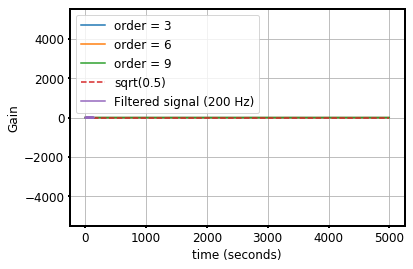

In [199]:
# In[17]:
 
 
"""
 
filter hütchens with bandpass butterworth filter 
around wingstroke frequency -220
sin wave 
 
hilbert transformation
-instantaneous phase
read out phase at that index
 
reference phase ventral flip
 
numpy angle 
hilbert then numpy out angle
scipy or numpy 
 
filter
scipy signal hilbert
angle
 
"""
 
##############
 
## Butterworth bandpass first
 
from scipy.signal import butter, lfilter
 
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
 
 
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
 
 
def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
 
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 10000.0
    lowcut = 100.0
    highcut = 1250.0
    T = 0.05
     
    f0 = 200.0
 
    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
 
    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
 
    hutch_det_butter = butter_bandpass_filter(hutch_det, lowcut, highcut, fs, order=6)
    plt.plot(t, hutch_det_butter, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
 
    plt.show()
 
 
run()
 
 
 
###############

(0.0, 120.0)

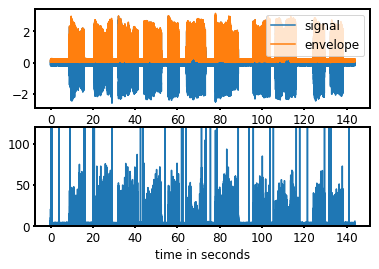

In [188]:
 
# In[ ]:
 
 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
 
 
 
#duration = 1.0
fs = 10000.0
#samples = int(fs*duration)
#t = np.arange(samples) / fs
t = times
#We create a chirp of which the frequency increases from 20 Hz to 100 Hz and apply an amplitude modulation.
 
fs1 = 200.0
lowcut = 100.0
highcut = 600.0
     
#signal = chirp(t, 20.0, t[-1], 100.0)
#signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )
signal = butter_bandpass_filter(hutch_det, lowcut, highcut, fs, order=6)
#signal = hutch_det
 
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
#instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_phase = np.angle(analytic_signal)
instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * fs1)
 
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
 
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 

In [192]:
 
# In[18]:
 
import numpy as np
 
print(np.asarray(bl.segments[0].analogsignals[0]))
print(len(x_val_peaks))
print(len(hutch))
 
from numpy import matrix
 
index=np.arange(len(times))
 
print(len(times))
 
#times=np.linspace(0,len(hutch)/(1/fs_axon),len(hutch))
 
 
# In[ ]:
 
####  Plot phase
 
## trough of the amplitude envelope marks the ventral flip
 
 
from scipy.signal import argrelmin
 
ventral_flips = argrelmin(amplitude_envelope, order = 5)
 
index_no =np.arange(311808)
 
inds_ventral_flip = argrelmin(amplitude_envelope, order = 5)
 
 
 
ventral_flips = zip(index_no[inds_ventral_flip], times[inds_ventral_flip], amplitude_envelope[inds_ventral_flip])
#print thresh_hutch
### these will be phase 0
 
 
 
#threshold_peak = 0.39
#sorted_peaks = sorted(zip_peak, key=lambda x: (x[2]))
 
 

[0.15167236 0.15563965 0.15411377 ... 0.09796143 0.05462646 0.06652832]
3560
1438720
1438720


IndexError: index 311875 is out of bounds for axis 1 with size 311808

ValueError: x and y must have same first dimension, but have shapes (1438720,) and (1,)

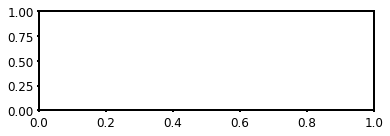

In [250]:
 
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.plot(times[inds_ventral_flip], amplitude_envelope[inds_ventral_flip], '.', color='r')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
 
 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 
 
 
# In[ ]:
 
#angle= np.angle(amplitude_envelope)
#phase= np.phase(amplitude_envelope[inds_ventral_flip])
 
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.plot(t, instantaneous_phase, label='envelope')
ax0.plot(times[inds_ventral_flip], amplitude_envelope[inds_ventral_flip], '.', color='r')
ax0.set_xlabel("time in seconds")
ax0.legend()
 
ax0.set_xlim(5,6)
#bokeh.plotting.show(bokeh.mpl.to_bokeh())
 
 
# In[ ]:
 
 
 

In [195]:
spike_inst_phase = instantaneous_phase[x_val_b]

In [196]:
df_inst_phase_upon_signal = pd.DataFrame()

for i in range(len(crimson_on)):
    on_signal = crimson_on[i]
    f = spike_inst_phase[on_signal-50: on_signal+100]
    df_inst_phase_upon_signal[i]=f

In [197]:
df_inst_phase_upon_signal.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.679897,-0.073306,-2.789134,-0.592241,-2.136821,2.599137,-3.111584,-0.466234,-1.382172,2.743001,0.146076
1,-2.082814,-0.452424,1.899374,-0.531557,-0.151930,-0.196795,0.763300,1.330242,-0.364936,1.101200,-1.134601
2,2.130783,-0.319213,-0.838106,1.760847,1.069764,-0.478979,0.219150,0.510186,2.437439,0.123018,0.543881
3,0.220087,2.332580,-2.876803,-1.666740,1.397808,0.111211,2.417298,0.466797,0.070895,-2.202398,1.401118
4,-0.730011,-3.065398,-0.059499,-0.205347,-2.569608,0.907939,-1.605997,0.620940,-2.791042,-2.689362,-2.988154


'freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'

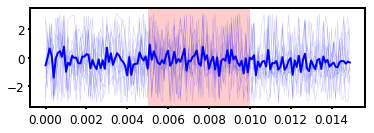

In [198]:
fig =plt.figure(15)

ax1 = plt.subplot(211)

for i in df_inst_phase_upon_signal:
    ax1.plot(times[0:150], df_inst_phase_upon_signal[i], 'b', linewidth =0.5, alpha = 0.2)
    
#ax1.set_ylim((-0.5,100))
#ax1.set_ylimit(-0.1, 100)

mean_df_inst_phase_upon_signal = df_inst_phase_upon_signal.mean(axis=1)
ax1.plot(times[0:150], mean_df_inst_phase_upon_signal, 'b', linewidth =2.0)

ax1.axvspan(times[50], times[100], facecolor = 'r', edgecolor = 'none', alpha = 0.2)

'''
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
#for i in range(len(crimson_on)):
#    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
#    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)